## $$Data \ analysis \ and \ prediction \ of \ Insurance \ Premium$$

We will be using Supervised Regression techniques to achieve the Bussiness Objective of advising an Insurance company to decide the insurance premium amount for a customer by versing through different factors in the provided dataset

**Why Regression?**

**Because the amount/premium insurance money is our target variable here and the respective values are continuous**

From the domain knowledge we can understand that insurance money depends on an individual's health, habits, age, medical background, relationships and income.

We'll run through all the steps of building a Regression model, but firstly let's explore and understand the information we bear.

### IMPORTING LIBRARIES

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,KFold, StratifiedKFold
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



### IMPORTING DATA

In [2]:
df=pd.read_csv("C:\\Users\\mearv\\OneDrive\\Desktop\\DS3_C6_S1_Regression_Insurance_Data_Project.csv")

In [3]:
df.head(5)                     #First 5 rows of the data

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [4]:
df.tail()                     #Last 5 rows of the data

,age,sex,bmi,classif,children,smoker,region,charges
1333,50,male,30.97,OB1,3,no,northwest,10600.5483
1334,18,female,31.92,OB1,0,no,northeast,2205.9808
1335,18,female,36.85,OB2,0,no,southeast,1629.8335
1336,21,female,25.80,PREO,0,no,southwest,2007.9450
1337,-1,female,29.07,PREO,0,yes,northwest,29141.3603


### STRUCTURE OF DATA

In [5]:
df.shape                      #Data has 1338 rows and 8 columns

(1338, 8)

### SUMMARY OF DATA

In [6]:
df.describe()                 #Summary of all numeric columns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [7]:
df.describe(include='object')         #Summary of all categorical/object type columns

,sex,classif,smoker,region
count,1338,1330,1338,1338
unique,2,6,2,4
top,male,OB1,no,southeast
freq,676,387,1064,364


### ***From the summary, we can observe there are 8 mising values in classif column***

In [8]:
df.info()                           #Information about the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


### ***There are 4 object type columns and 4 numeric data type columns***

## DATA VISUALISATION

In [9]:
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


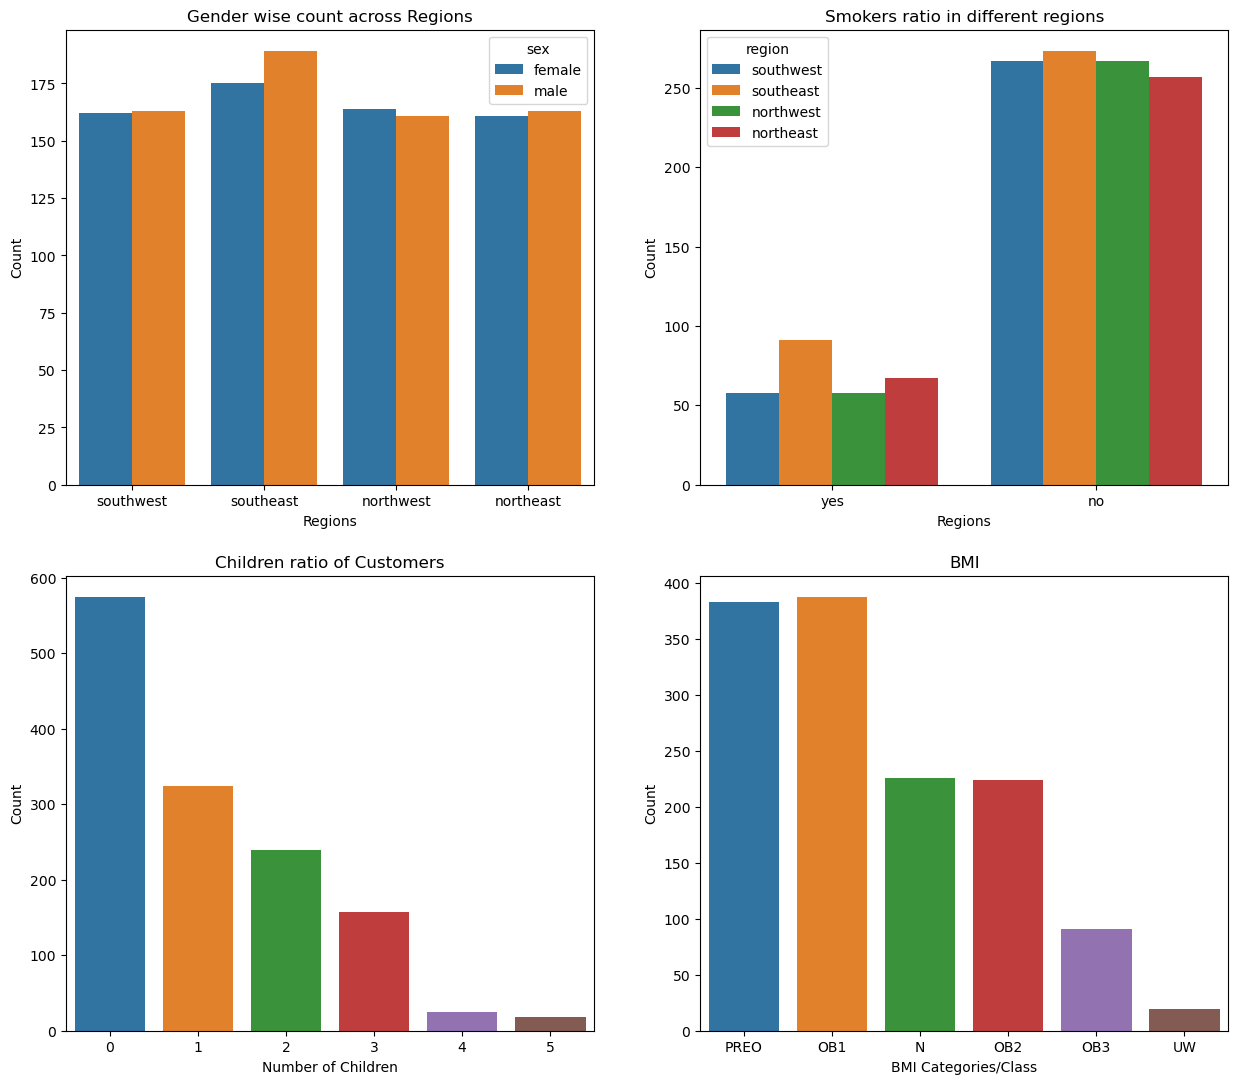

In [48]:
plt.figure(figsize=(15,13))

plt.subplot(221)
sns.countplot(df.region,hue=df.sex)
plt.title('Gender wise count across Regions')
plt.xlabel('Regions')
plt.ylabel('Count')


plt.subplot(222)
sns.countplot(df.smoker,hue=df.region)
plt.title('Smokers ratio in different regions')
plt.xlabel('Regions')
plt.ylabel('Count')

plt.subplot(223)
sns.countplot(df.children)
plt.title('Children ratio of Customers')
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(224)
sns.countplot(df.classif)
plt.title('BMI')
plt.xlabel('BMI Categories/Class')
plt.ylabel('Count')
plt.show()

**PLOT 1 - Displays us the that Males are present more in every region**

**PLOT 2 - Shows us that smokers are higher in number in Southeast region**

**PLOT 3 - Many of the customers have no Children**

**PLOT 4 - Many of the customers belong to PREO and OB1 Class of BMI**

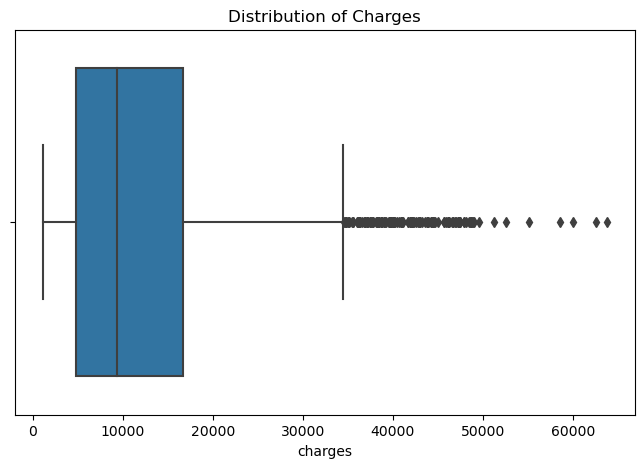

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(df.charges)
plt.title("Distribution of Charges")
plt.show()

**The charges range from 5000 - 18000 across all regions**

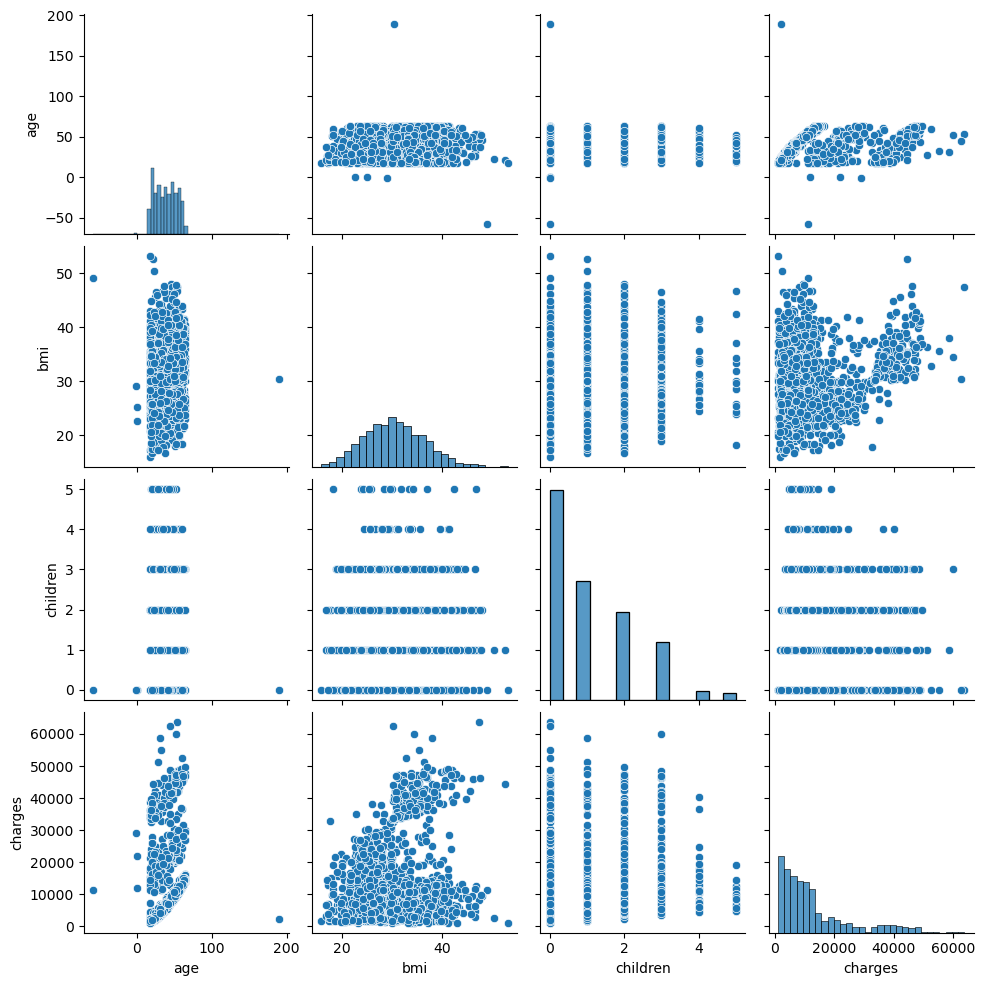

In [50]:

sns.pairplot(df)

### ***The above pairplot gives relationship between all the columns***

#### **From all the above observations, we have explored more about the data and now proceed to prepare the data for us to work with**

## DATA PREPROCESSING

### 1.CHECK FOR MISSING VALUES

In [51]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

**From the info() function and data Dictionary,we understand classif defines the Health classification category wise, so we will be treating the missing values with mode(Most repeated value)**

In [52]:
df.fillna(st.mode(df['classif']),inplace=True)            

In [53]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

**The missing values have been treated to null**

### CHECK FOR SPECIAL CHARACTERS IN THE DATA

In [54]:
for cols in df.columns:
    print(cols,'\n',df[cols].value_counts())
    print('---------------------------------------------------------------')

age 
  18     69
 19     67
 50     29
 20     29
 45     29
 48     29
 51     29
 52     29
 47     29
 46     29
 25     28
 22     28
 28     28
 53     28
 21     28
 54     28
 24     28
 26     28
 49     28
 27     28
 23     28
 42     27
 30     27
 41     27
 31     27
 29     27
 44     27
 43     27
 40     27
 56     26
 55     26
 32     26
 34     26
 57     26
 33     25
 39     25
 38     25
 36     25
 35     25
 59     25
 37     25
 58     23
 63     23
 62     23
 60     23
 61     22
 64     22
 0       2
-58      1
 190     1
-1       1
Name: age, dtype: int64
---------------------------------------------------------------
sex 
 male      676
female    662
Name: sex, dtype: int64
---------------------------------------------------------------
bmi 
 32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
-------------------------------------

**There are special characters present in the data**

### 2.LABEL ENCODING

#### FEATURE ENGINEERING

***Now moving ahead to converting the categorical data to numerics so the machine can understand and consider it***

In [55]:
df.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

### CONVERTION OF OBJECT DATA TYPE TO CATEGORICAL

In [56]:
for cols in df.select_dtypes(include='object'):
    df[cols]=df[cols].astype('category')

In [57]:
df.dtypes

age            int64
sex         category
bmi          float64
classif     category
children       int64
smoker      category
region      category
charges      float64
dtype: object

**By using for loop,we have accessed all the object type columns and converted into categorical datatype**

### CONVERTION OF CATEGORICAL TO NUMERIC 

In [60]:
le=LabelEncoder()                   #Label Encoder fit transforms categorical values and assigns them into numerical values 

In [61]:
for cols in df.select_dtypes(include='category'):
    df[cols+'_encode']=le.fit_transform(df[cols])

In [62]:
df.dtypes

age                  int64
sex               category
bmi                float64
classif           category
children             int64
smoker            category
region            category
charges            float64
sex_encode           int32
classif_encode       int32
smoker_encode        int32
region_encode        int32
dtype: object

In [63]:
df.head()

,age,sex,bmi,classif,children,smoker,region,charges,sex_encode,classif_encode,smoker_encode,region_encode
0,19,female,27.900,PREO,0,yes,southwest,16884.92400,0,4,1,3
1,18,male,33.770,OB1,1,no,southeast,1725.55230,1,1,0,2
2,28,male,33.000,OB1,3,no,southeast,4449.46200,1,1,0,2
3,0,male,22.705,N,0,no,northwest,21984.47061,1,0,0,1
4,32,male,28.880,PREO,0,no,northwest,3866.85520,1,4,0,1


#### ***New columns with numeric values of the respective categorical values have been appended***

### 3.DATA SCALING

In [71]:
df.head(2)

,age,sex,bmi,classif,children,smoker,region,charges,sex_encode,classif_encode,smoker_encode,region_encode
0,19,female,27.90,PREO,0,yes,southwest,16884.9240,0,4,1,3
1,18,male,33.77,OB1,1,no,southeast,1725.5523,1,1,0,2


    Since the values in data is distant to each other in different columns, we make the data unit free by Normalisation using MinMaxScaler(in built function)

In [68]:
def feature_scale(scale):
    numerics=['int16','int32','int64','float16','float32','float64']
    new_df=df.select_dtypes(include=numerics)
    if scale=='minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
    return df_scaled

### NORMALISATION

In [69]:
scale='minmax'
scaled_df=feature_scale(scale)
scaled_df

,age,bmi,children,charges,sex_encode,classif_encode,smoker_encode,region_encode
0,0.310484,0.321227,0.0,0.251611,0.0,0.8,1.0,1.000000
1,0.306452,0.479150,0.2,0.009636,1.0,0.2,0.0,0.666667
2,0.346774,0.458434,0.6,0.053115,1.0,0.2,0.0,0.666667
3,0.233871,0.181464,0.0,0.333010,1.0,0.0,0.0,0.333333
4,0.362903,0.347592,0.0,0.043816,1.0,0.8,0.0,0.333333
...,...,...,...,...,...,...,...,...
1333,0.435484,0.403820,0.6,0.151299,1.0,0.2,0.0,0.333333
1334,0.306452,0.429379,0.0,0.017305,0.0,0.2,0.0,0.000000
1335,0.306452,0.562012,0.0,0.008108,0.0,0.4,0.0,0.666667
1336,0.318548,0.264730,0.0,0.014144,0.0,0.8,0.0,1.000000


### 4.CORRELATION

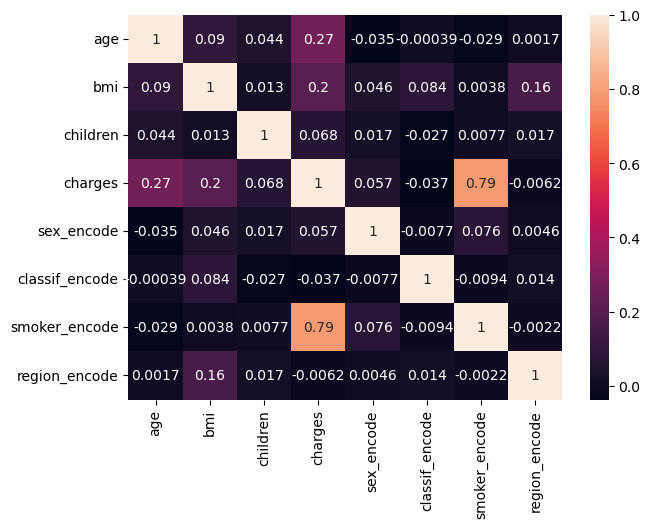

In [76]:
plt.figure(figsize=(7,5))
sns.heatmap(scaled_df.corr(),annot=True)
plt.show()

* We already are aware that our Target Variable is charges, so our y is already derived
* Now, we carefully observe the correlation between charges and other fetaures so that they can be considered as features

#### Since the number of features are quite low, we can consider every columns as x 

#### *Let's split the data now, the feature we are interested in predicting is Charges, so that'll be our y*

In [77]:
x=scaled_df.drop(columns=['charges'])           #Features
y=scaled_df['charges']                          #Target

In [79]:
x.head()

,age,bmi,children,sex_encode,classif_encode,smoker_encode,region_encode
0,0.310484,0.321227,0.0,0.0,0.8,1.0,1.000000
1,0.306452,0.479150,0.2,1.0,0.2,0.0,0.666667
2,0.346774,0.458434,0.6,1.0,0.2,0.0,0.666667
3,0.233871,0.181464,0.0,1.0,0.0,0.0,0.333333
4,0.362903,0.347592,0.0,1.0,0.8,0.0,0.333333


### 5.DATA SPLITTING

#### TRAIN-TEST SPLIT METHOD

***Here we go with the in built function to split the data into 70% for Training and 30% for Testing the Model***

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=20)

In [83]:
x.shape               #Total Rows

(1338, 7)

In [81]:
x_train.shape         #Rows split for Training

(936, 7)

In [82]:
x_test.shape          #Rows split for Testing

(402, 7)

In [84]:
y_train.shape

(936,)

In [85]:
y_test.shape

(402,)

## DATA MODELLING

### 1. BASELINE MULTIPLE LINEAR REGRESSION MODEL(MULTIPLE FEATURES)

#### MODEL TRAINING

In [86]:
base_model=LinearRegression()

In [87]:
base_model.fit(x_train,y_train)

LinearRegression()

#### PREDICTED  VALUES

In [88]:
y_predict_base_model=base_model.predict(x_test)           #Machine Predicted Values 

In [211]:
pred_vals1=pd.DataFrame()
pred_vals1['Actual']=y_test
pred_vals1['Predicted']=y_predict_base_model
pred_vals1

,Actual,Predicted
698,0.157296,0.189477
520,0.391624,0.121602
1144,0.135814,0.172043
908,0.224238,0.261345
559,0.008373,0.074499
...,...,...
711,0.143425,0.132905
20,0.193252,0.213215
1250,0.279760,0.431131
205,0.051332,0.065641


#### R2 value(Co-efficient of Determination)

In [89]:
base_model.score(x_train,y_train)                        #Train Data Score

0.7287827560472273

In [90]:
base_model.score(x_test,y_test)                          #Test Data score

0.7608720618598334

#### Slope

In [111]:
slope=base_model.coef_
slope

array([ 0.83658638,  0.20253472,  0.04984616,  0.00147625, -0.02693305,
        0.38230063, -0.01405152])

In [112]:
coeffecients = pd.DataFrame(slope,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,0.836586
bmi,0.202535
children,0.049846
sex_encode,0.001476
classif_encode,-0.026933
smoker_encode,0.382301
region_encode,-0.014052


#### **This table depicts that a unit increase in bmi, increases the value of Charges by 0.83 annualy and similarly for others**

#### Intercept

In [92]:
base_model.intercept_

-0.283288137177682

#### MODEL EVALUATORS

#### Errors

In [93]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_predict_base_model))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_predict_base_model))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_predict_base_model,squared=False))

Mean absolute Error, MAE : 0.06639552711028938
Mean Squared Error, MSE : 0.008606301527869432
Root Mean Sqaured Error, RMSE : 0.09277015429473766


### 2. DECISION TREE REGRESSOR(Default)

In [113]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))



R-Squared on train dataset=0.8526550428601369
R-Squared on test dataset=0.8717117571222629


In [162]:
y_predict_dtm=dtm.predict(x_test)

In [212]:
pred_vals2=pd.DataFrame()
pred_vals2['Actual']=y_test
pred_vals2['Predicted']=y_predict_dtm
pred_vals2

,Actual,Predicted
698,0.157296,0.206003
520,0.391624,0.144422
1144,0.135814,0.144422
908,0.224238,0.206003
559,0.008373,0.048550
...,...,...
711,0.143425,0.144422
20,0.193252,0.206003
1250,0.279760,0.276892
205,0.051332,0.125233


#### ERRORS

In [163]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_predict_dtm))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_predict_dtm))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_predict_dtm,squared=False))

Mean absolute Error, MAE : 0.04411869788184113
Mean Squared Error, MSE : 0.004617140553602668
Root Mean Sqaured Error, RMSE : 0.06794954417509118


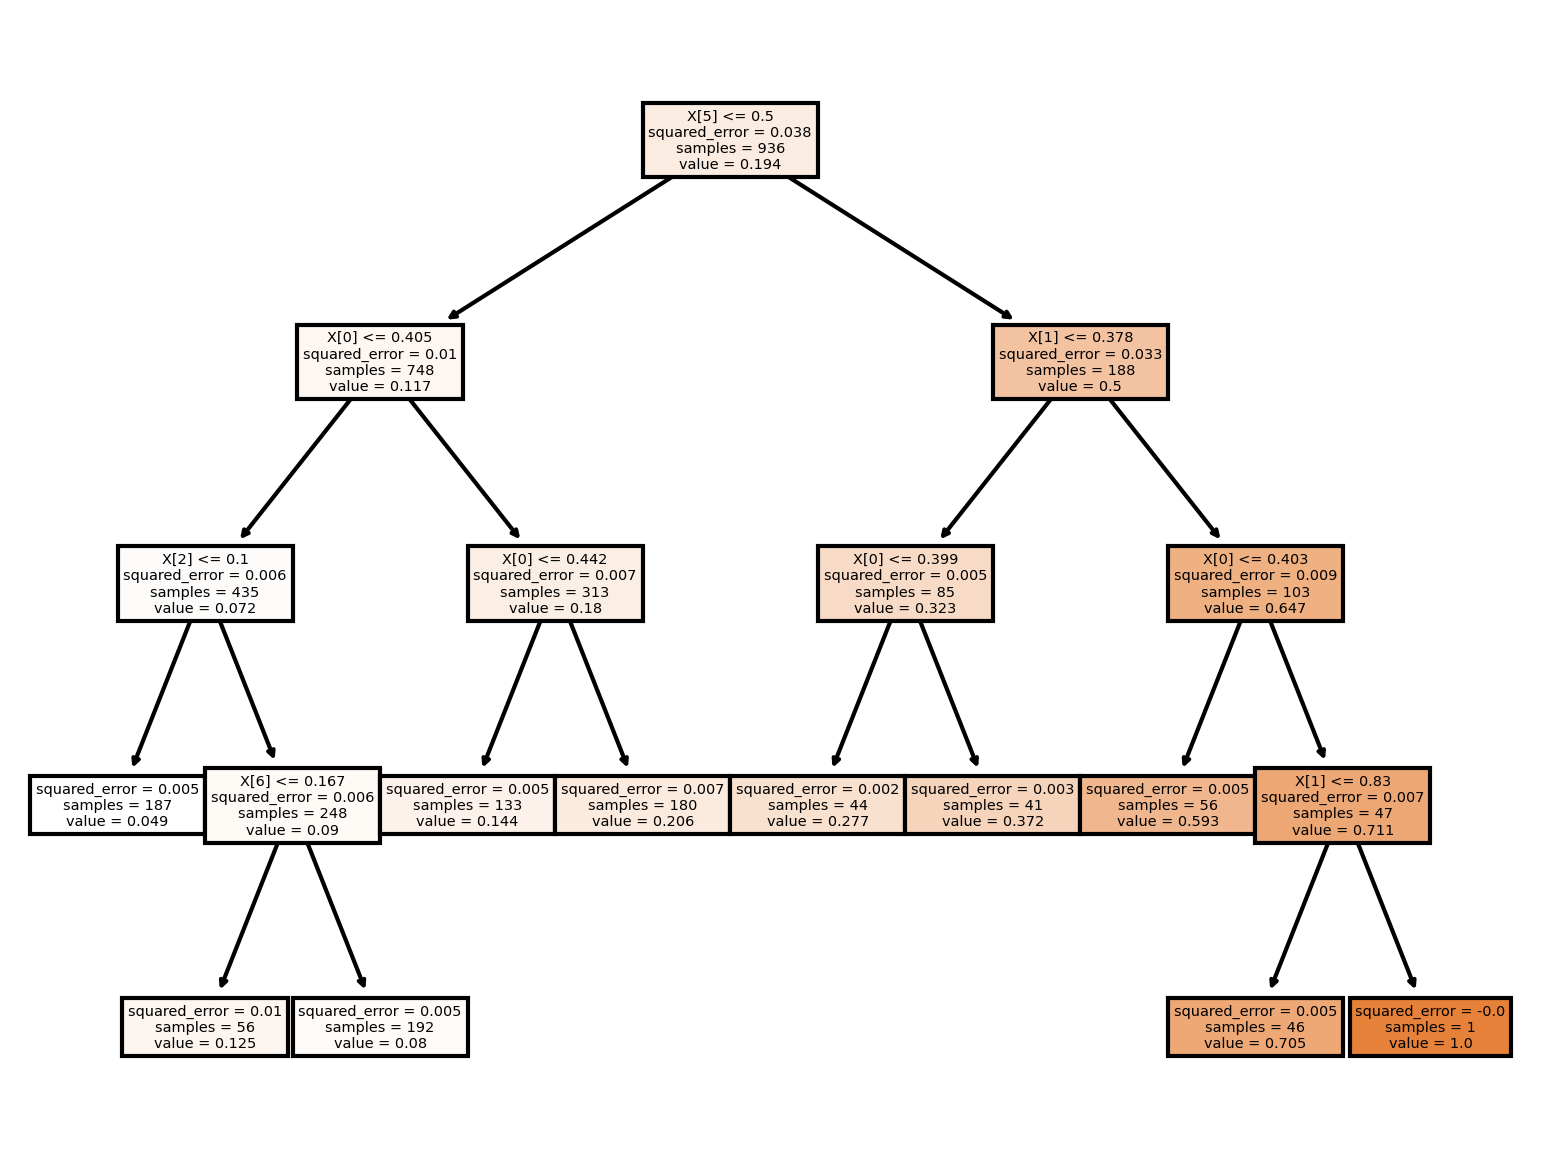

In [110]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,
           filled = True);

#save figure in current directory as png
fig.savefig('Insurance_Premium.png')

#### CROSS VALIDATION USING KFOLD FOR HYPERTUNING THE DECISION TREE

In [103]:
kf = KFold(n_splits=3, shuffle=False, random_state=None)
for train, test in kf.split(x):
    print("Train data",train,"Test data",test)

Train data [ 446  447  448  449  450  451  452  453  454  455  456  457  458  459
  460  461  462  463  464  465  466  467  468  469  470  471  472  473
  474  475  476  477  478  479  480  481  482  483  484  485  486  487
  488  489  490  491  492  493  494  495  496  497  498  499  500  501
  502  503  504  505  506  507  508  509  510  511  512  513  514  515
  516  517  518  519  520  521  522  523  524  525  526  527  528  529
  530  531  532  533  534  535  536  537  538  539  540  541  542  543
  544  545  546  547  548  549  550  551  552  553  554  555  556  557
  558  559  560  561  562  563  564  565  566  567  568  569  570  571
  572  573  574  575  576  577  578  579  580  581  582  583  584  585
  586  587  588  589  590  591  592  593  594  595  596  597  598  599
  600  601  602  603  604  605  606  607  608  609  610  611  612  613
  614  615  616  617  618  619  620  621  622  623  624  625  626  627
  628  629  630  631  632  633  634  635  636  637  638  639  640 

In [105]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [106]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), x, y, cv= kf,
    scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.12
For max depth: 2
rmse= 0.08
For max depth: 3
rmse= 0.08
For max depth: 4
rmse= 0.08
For max depth: 5
rmse= 0.08
For max depth: 6
rmse= 0.08
For max depth: 7
rmse= 0.09
For max depth: 8
rmse= 0.09
For max depth: 9
rmse= 0.10
For max depth: 10
rmse= 0.10
For max depth: 11
rmse= 0.10
For max depth: 12
rmse= 0.11
For max depth: 13
rmse= 0.11
For max depth: 14
rmse= 0.11
For max depth: 15
rmse= 0.11


**We can conclude the Decision Tree we already modelled has minimal error to work with and can be considered without any further hypertuning**

### 3.RANDOM FOREST REGRESSOR(Default)

In [115]:
forest=RandomForestRegressor(n_estimators=100,criterion='squared_error',random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [116]:
print("R-Squared on train dataset={}".format(forest.score(x_train,y_train)))
print("R-Squared on test dataset={}".format(forest.score(x_test,y_test)))

R-Squared on train dataset=0.9742955684983615
R-Squared on test dataset=0.865949858043822


#### PREDICTED VALUES

In [129]:
y_predict_bagging=forest.predict(x_test)

In [213]:
pred_vals3=pd.DataFrame()
pred_vals3['Actual']=y_test
pred_vals3['Predicted']=y_predict_bagging
pred_vals3

,Actual,Predicted
698,0.157296,0.177426
520,0.391624,0.142607
1144,0.135814,0.166218
908,0.224238,0.258367
559,0.008373,0.027917
...,...,...
711,0.143425,0.173334
20,0.193252,0.226527
1250,0.279760,0.280673
205,0.051332,0.148784


#### ERRORS

In [164]:
print('Mean absolute Error, MAE :',    mean_absolute_error(y_test,y_predict_bagging))
print('Mean Squared Error, MSE :',   mean_squared_error(y_test,y_predict_bagging))
print('Root Mean Sqaured Error, RMSE :',mean_squared_error(y_test,y_predict_bagging,squared=False))

Mean absolute Error, MAE : 0.039761342807280234
Mean Squared Error, MSE : 0.004824513398565473
Root Mean Sqaured Error, RMSE : 0.06945871722516529


#### DATA VISUALISATION 

In [153]:
plot_df=pd.DataFrame({"Actual": y_test,'Predicted': y_predict_bagging})
plot_df.head()

,Actual,Predicted
698,0.157296,0.177426
520,0.391624,0.142607
1144,0.135814,0.166218
908,0.224238,0.258367
559,0.008373,0.027917


In [144]:
small=plot_df[:30]

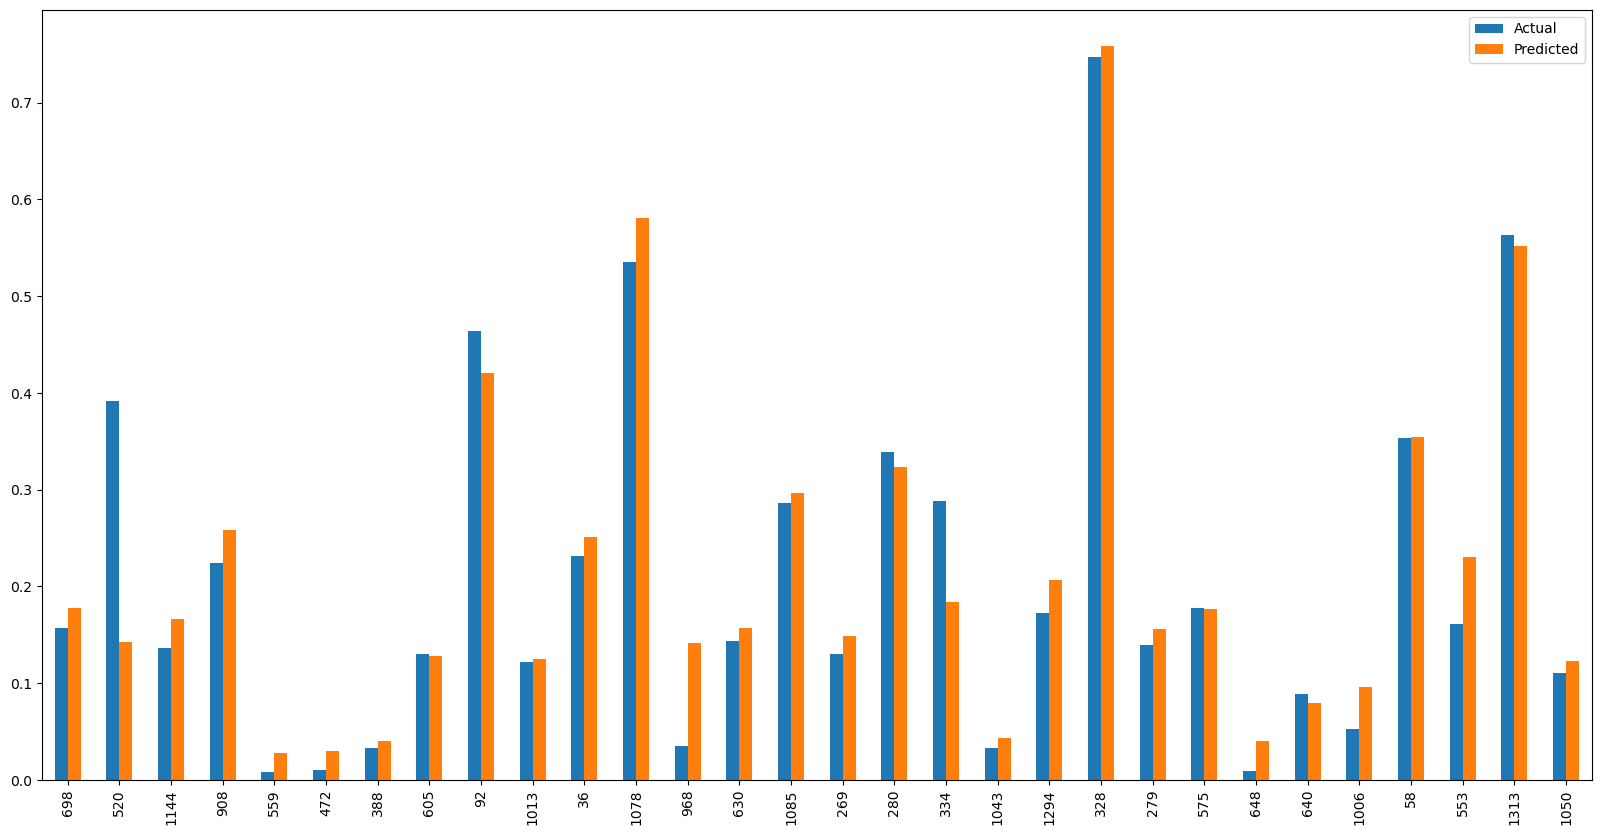

In [152]:

small.plot(y=['Actual','Predicted'],kind='bar',figsize=(20,10))
plt.show()


***The above graph displays the predicted and actual values for a small portion of data***


#### HYPERTUNING TO OBTAIN BEST PARAMTERS

In [130]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [134]:
grid_search = GridSearchCV(estimator=forest,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="r2")

In [135]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [166]:
grid_search.score(x_test,y_test)

0.8852527812802222

In [161]:
grid_search.best_score_          #Hypertuned Random Forest model

0.8449259634727287

In [175]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      n_jobs=-1, random_state=1)

### HYPERTUNED RANDOM FOREST ALGORITHIM

In [176]:
hyper_tuned_forest=RandomForestRegressor(n_estimators=50,criterion='squared_error',random_state=1,n_jobs=-1,max_depth=5,min_samples_leaf=5)
hyper_tuned_forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      n_jobs=-1, random_state=1)

In [177]:
print("R-Squared on train dataset={}".format(hyper_tuned_forest.score(x_train,y_train)))
print("R-Squared on test dataset={}".format(hyper_tuned_forest.score(x_test,y_test)))

R-Squared on train dataset=0.8760130180793795
R-Squared on test dataset=0.8852527812802222


#### PREDICTED VALUES

In [178]:
y_predict_bagging_tuned=hyper_tuned_forest.predict(x_test)

In [214]:
pred_vals4=pd.DataFrame()
pred_vals4['Actual']=y_test
pred_vals4['Predicted']=y_predict_bagging_tuned
pred_vals4

,Actual,Predicted
698,0.157296,0.184115
520,0.391624,0.161422
1144,0.135814,0.151944
908,0.224238,0.278461
559,0.008373,0.032738
...,...,...
711,0.143425,0.155428
20,0.193252,0.218493
1250,0.279760,0.293828
205,0.051332,0.108577


#### After hypertuning, the model's score seems have to be increased, hence we can go with Random Forest with Hypertuning

## COMPARISION

In [347]:
Rsquared={'Linear_Regression':round(base_model.score(x_test,y_test),2)*100  ,'Decision_tree':round(dtm.score(x_test,y_test),2)*100,'Random_Forest(default)':round(forest.score(x_test,y_test),2)*100,'Random_Forest(Hypertuned)':round(grid_search.score(x_test,y_test),2)*100}

In [355]:
Rsquared                 #Dictionary of Models and their respective Rsquared values

{'Linear_Regression': 76.0,
 'Decision_tree': 87.0,
 'Random_Forest(default)': 87.0,
 'Random_Forest(Hypertuned)': 89.0}

In [354]:
name=list(Rsquared.keys())
values=list(Rsquared.values())

#### COMPARISION OF RSQUARED IN TERMS OF VISUALS

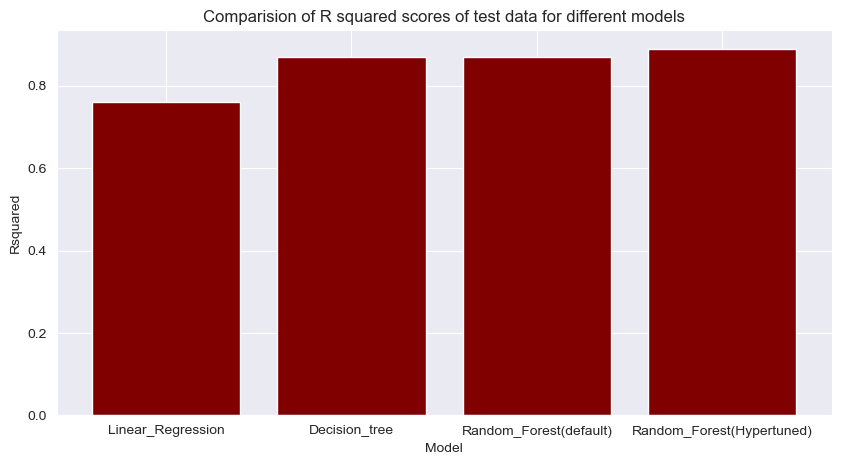

In [254]:
plt.figure(figsize=(10,5))
plt.bar(name,values,color='maroon')
plt.title("Comparision of R squared scores of test data for different models")
plt.xlabel("Model")
plt.ylabel("Rsquared")
plt.show()

#### COMPARISION IN TERMS OF NUMERIC VALUES

In [325]:
r_squared.sort_values('R2',ascending=False)

,Model,R2
3,Random_Forest(Hypertuned),89.0%
1,Decision_tree,87.0%
2,Random_Forest(default),87.0%
0,Linear_Regression,76.0%


In [360]:
r_squared=pd.DataFrame({'Model':name,"R2":values})
r_squared.sort_values('R2',ascending=False)

,Model,R2
3,Random_Forest(Hypertuned),89.0
1,Decision_tree,87.0
2,Random_Forest(default),87.0
0,Linear_Regression,76.0


### ***From the visuals and Numeric values, we can comprehend that Random_Forest(Hypertuned)  followed by Decision Tree algorithim have the highest R sqaured values***

In [259]:
Rmse={'Linear_Regression':round(mean_squared_error(y_test,y_predict_base_model,squared=False),3)
      ,'Decision_tree':round(mean_squared_error(y_test,y_predict_dtm,squared=False),3)
      ,'Random_Forest(default)':round(mean_squared_error(y_test,y_predict_bagging,squared=False),3)
      ,'Random_forest(HYpertuned)' : round(mean_squared_error(y_test,y_predict_bagging_tuned,squared=False),3)
      }

In [260]:
name1=list(Rmse.keys())
values1=list(Rmse.values())

#### COMPARISION OF ERRORS BY VISUALS

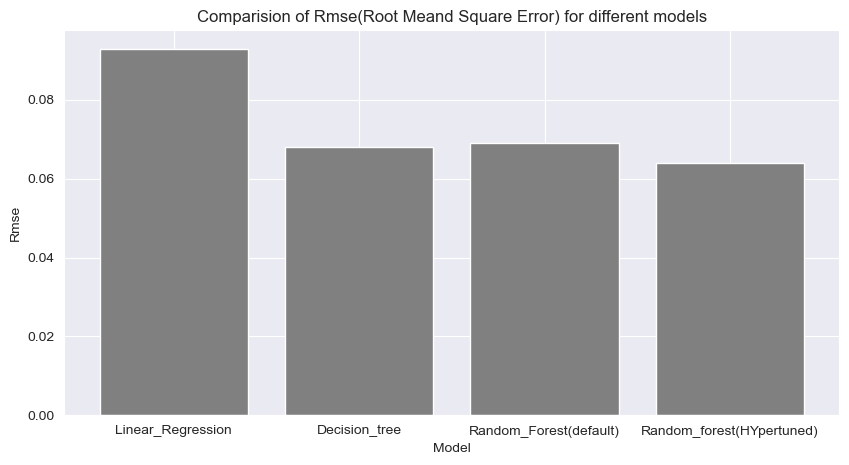

In [261]:
plt.figure(figsize=(10,5))
plt.bar(name1,values1,color='grey')
plt.title("Comparision of Rmse(Root Meand Square Error) for different models")
plt.xlabel("Model")
plt.ylabel("Rmse")
plt.show()

#### COMPARISION OF ERRORS BY NUMERICAL VALUES

In [262]:
rmsee=pd.DataFrame({'Model':name1,"Rmse":values1})                 
rmsee.sort_values('Rmse',ascending=True)

,Model,Rmse
3,Random_forest(HYpertuned),0.064
1,Decision_tree,0.068
2,Random_Forest(default),0.069
0,Linear_Regression,0.093


#### As expected, the erros are minimal in both ***Random Forest(Hypertuned)*** followed by ***Random Forest(default)*** but the difference isn't that high to be considered

### VISUALISATION OF PREDICTED AND ACTUAL VALUES

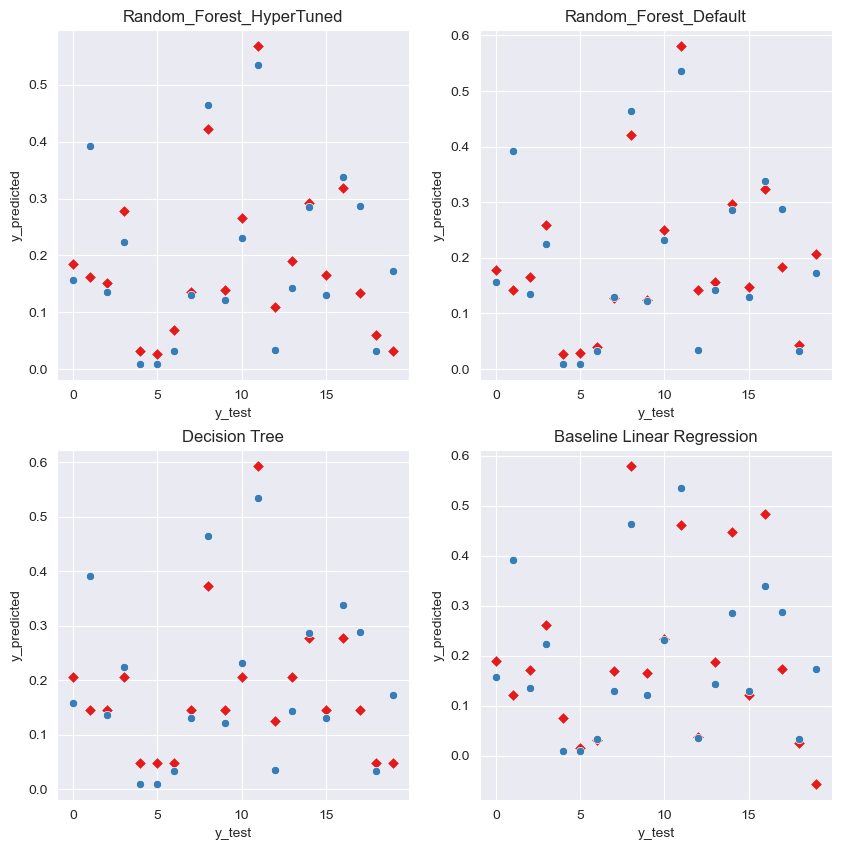

In [244]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')

sns.set_palette('Set1')
plt.subplot(221)
plt.title('Random_Forest_HyperTuned')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
index1=range(0,len(y_test[0:20]))


sns.scatterplot(x=index1,y=y_predict_bagging_tuned[0:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])


plt.subplot(222)
plt.title('Random_Forest_Default')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
sns.scatterplot(x=index1,y=y_predict_bagging[0:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])


plt.subplot(223)
plt.title('Decision Tree')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
sns.scatterplot(x=index1,y=y_predict_dtm[:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])


plt.subplot(224)
plt.title('Baseline Linear Regression')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
sns.scatterplot(x=index1,y=y_predict_base_model[:20],marker='D')
sns.scatterplot(x=index1,y=y_test[0:20])

plt.show()

*Machine Predicted Values are denoted by the shape of a Diamond*

*Actual Values have taken the form of a circle*

### The errors in PLOT 1 and 2 to have a good relationship while the other 2 plots are a bit diversed

## CONCLUSION

In [327]:
coeffecients = pd.DataFrame(slope,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,0.836586
bmi,0.202535
children,0.049846
sex_encode,0.001476
classif_encode,-0.026933
smoker_encode,0.382301
region_encode,-0.014052


***This table from mulit regression baseline model depicts that for a unit increase in bmi feature, the value of Charges increases by 0.2 annualy and similarly for other features. We can aslo observe region and classif features give decrement for a raise in their unit***

***Hence, the insurance company can mainly focus on age and bmi features as it increases the highest when altered by a unit***

#### MODEL DECIDERS

In [326]:
r_squared.sort_values('R2',ascending=False)     #Rsquared Values have been sorted accordingly

,Model,R2
3,Random_Forest(Hypertuned),89.0%
1,Decision_tree,87.0%
2,Random_Forest(default),87.0%
0,Linear_Regression,76.0%


In [264]:
rmsee.sort_values('Rmse',ascending=True)         #Errors have been sorted in ascending Order

,Model,Rmse
3,Random_forest(HYpertuned),0.064
1,Decision_tree,0.068
2,Random_Forest(default),0.069
0,Linear_Regression,0.093


In [370]:
r_squared['RMSE']=rmsee['Rmse']                #Appending rmse values

In [386]:
Model_final1=r_squared.sort_values('R2',ascending=False)           #Sorting values of R2 by Descending order

In [387]:
Model_final1['R2']=Model_final1['R2'].astype(str) + '%'             #Converting R2 to str to add % 

In [388]:
Model_final1                               #DataFrame contains Model and their respective R2 and RMSE values

,Model,R2,RMSE
3,Random_Forest(Hypertuned),89.0%,0.064
1,Decision_tree,87.0%,0.068
2,Random_Forest(default),87.0%,0.069
0,Linear_Regression,76.0%,0.093


### ***The Insurance Company can select the algorithim to find the premium money addressed to customers by the order of either RMSE or R2 values of the respective algorithim***